In [0]:
from keras.datasets import mnist
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout
from keras.optimizers import Adam,RMSprop
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [0]:
(xtr,ytr),(xts,yts)=mnist.load_data()

In [128]:
xtr.shape

(60000, 28, 28)

In [129]:
ytr.shape

(60000,)

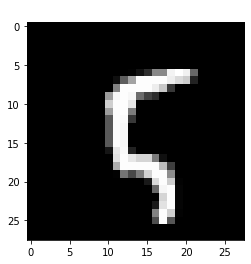

In [130]:
plt.imshow(xtr[100],cmap='gray')
plt.title(ytr[100],color='w')
plt.show()

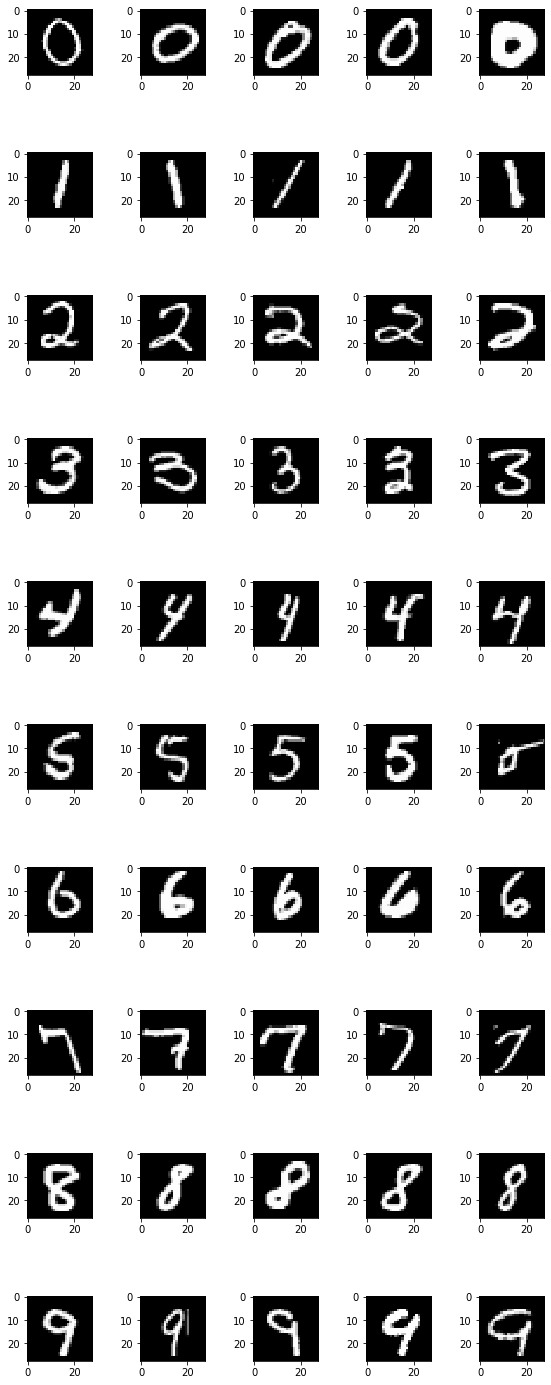

In [131]:
n_classes=10
n_cols=5
fig,axes=plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(8,20))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_classes):
      selected_images=xtr[ytr==j]
      img=selected_images[random.randint(0,len(selected_images)-1),:,:]
      axes[j][i].imshow(img,cmap='gray')

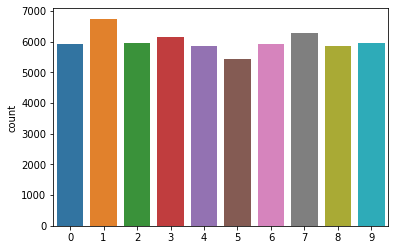

In [132]:
sns.countplot(ytr)
plt.show()

In [0]:
xtr=(xtr.reshape(xtr.shape[0],28,28,1))/255
xts=(xts.reshape(xts.shape[0],28,28,1))/255

In [0]:
ytr=to_categorical(ytr,10)
yts=to_categorical(yts,10)

In [0]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(RMSprop(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [136]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 64)         

In [137]:
h=model.fit(xtr,ytr,epochs=10,verbose=1,validation_data=(xts,yts))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.3624 - acc: 0.8903 - val_loss: 0.0936 - val_acc: 0.9716
Epoch 2/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0948 - acc: 0.9708 - val_loss: 0.0576 - val_acc: 0.9816
Epoch 3/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0651 - acc: 0.9794 - val_loss: 0.0419 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.0511 - acc: 0.9841 - val_loss: 0.0370 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0423 - acc: 0.9865 - val_loss: 0.0310 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0363 - acc: 0.9890 - val_loss: 0.0259 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0317 - acc: 0.9906 - val_loss: 0.

In [0]:
model.save('fashin_mnist.h5')

In [114]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 4.bmp to 4 (2).bmp
User uploaded file "4.bmp" with length 502854 bytes


In [0]:
from google.colab import files
files.download('fashin_mnist.h5')

In [0]:
import cv2


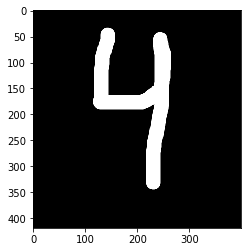

In [139]:
img=cv2.imread(r"4.bmp")
plt.imshow(img,cmap='gray')
plt.show()

In [0]:
def preprocess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(28,28))
    img=img.reshape(1,28,28,1)
    img=img/255
    return img
img=preprocess(img)

In [141]:
model.predict_classes(img)

array([4])

In [0]:
layer1=Model(model.layers[0].input,model.layers[0].output)

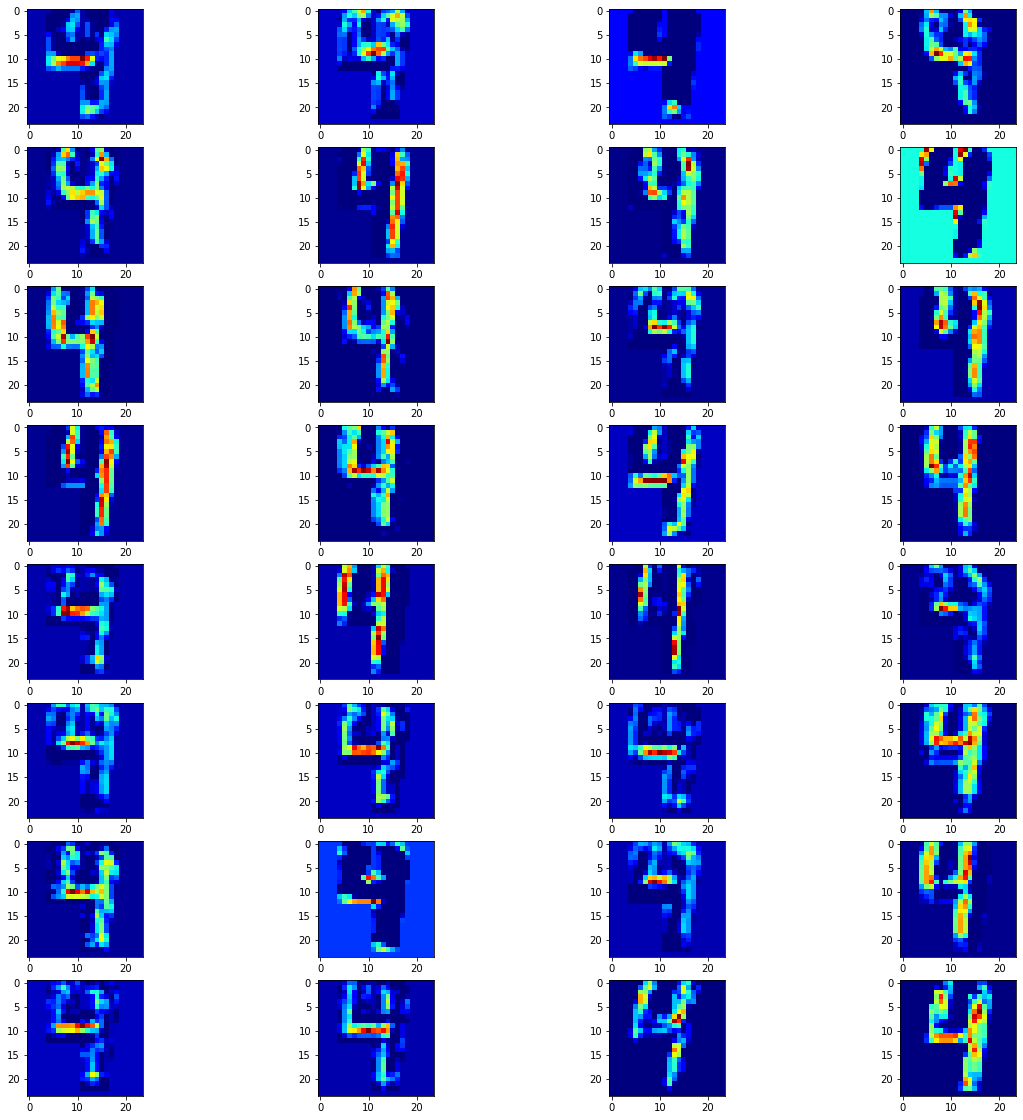

In [143]:
features_1=layer1.predict(img)
plt.figure(figsize=(20,20))
for i in range(32):
  plt.subplot(8,4,i+1)
  plt.imshow(features_1[0,:,:,i],cmap='jet')
plt.show()